# Analysis of traditional stock and bond portfolios: Conservative, Moderate, and Aggressive

## Performing analysis on traditional portfolios to set a benchmark to compare risk/return to portfolios that include digital assets

In [1]:
# Initial imports
import os
import pandas as pd
from pathlib import Path
import numpy as np
import alpaca_trade_api as tradeapi
import hvplot.pandas

In [2]:
from MCForecastTools import MCSimulation

In [3]:
# Load .env variables
from dotenv import load_dotenv
load_dotenv("alpaca.env")

True

In [4]:
# Set alpaca key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

## Find risk and return on traditional portfolios
### Define assets and weights

In [5]:
# Define assets and weights for conservative portfolio 
conservative_tickers = ['BIV', 'BSV,' 'VB', 'VV', 'VXUS']
cons_weights = [.4, .1, .2 ,.25, .05]

In [6]:
# Define assets and weights for moderate portfolio
moderate_tickers = ['BND', 'VB', 'VV', 'VWO', 'VXUS']
mod_weights = [.3, .25, .25, .05, .15]

In [7]:
# Define assets and weights for aggressive portfolio
aggressive_tickers = ['BND', 'VB', 'VV', 'VWO', 'VXUS']
agg_weights = [.1, .30, .30 ,.1, .2]

### Run Monte Carlo simulation on conservative portfolio

In [8]:
# Set timeframe to 1 day
timeframe = "1D"

# Set start and end dates
start_date = pd.Timestamp('2015-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-11-10', tz='America/New_York').isoformat()

# Get 6 years worth of price data
conservative_data = api.get_barset(
    conservative_tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df



In [9]:
# Clean data
conservative_data = conservative_data.dropna()
conservative_data.head()

BIV                                     BSV  \
                            open   high      low  close    volume   open   
time                                                                       
2017-11-21 00:00:00-05:00  84.26  84.30  84.1300  84.21  440780.0  79.39   
2017-11-22 00:00:00-05:00  84.28  84.48  84.2300  84.42  459607.0  79.41   
2017-11-24 00:00:00-05:00  84.37  84.43  84.3500  84.38  223736.0  79.43   
2017-11-27 00:00:00-05:00  84.41  84.48  84.3100  84.43  424371.0  79.44   
2017-11-28 00:00:00-05:00  84.53  84.58  84.4316  84.49  430305.0  79.48   

                                                              ...      VV  \
                            high      low   close     volume  ...    open   
time                                                          ...           
2017-11-21 00:00:00-05:00  79.40  79.3300  79.360   887800.0  ...  119.05   
2017-11-22 00:00:00-05:00  79.48  79.3900  79.470   932371.0  ...  119.50   
2017-11-24 00:00:00-05:00  79.46  79.4222  79.445   395388.0  ...  119.65   
2017-11-27 00:00:00-05:00  79.48  79.4000  79.465   789211.0  ...  119.70   
2017-11-28 00:00:00-05:00  79.50  79.4500  79.460  1252836.0  ...  119.81   

                                                                VXUS         \
                               high     low   close    volume   open   high   
time                                                                          
2017-11-21 00:00:00-05:00  119.5200  119.05  119.42  121311.0  56.10  56.30   
2017-11-22 00:00:00-05:00  119.5800  119.28  119.36  111051.0  56.51  56.53   
2017-11-24 00:00:00-05:00  119.6900  119.52  119.61   71618.0  56.71  56.75   
2017-11-27 00:00:00-05:00  119.8099  119.44  119.63  122179.0  56.59  56.59   
2017-11-28 00:00:00-05:00  120.7600  119.75  120.71  158471.0  56.53  56.64   

                                                      
                               low  close     volume  
time                                                  
2017-11-21 00:00:00-05:00  56.1000  56.23   441686.0  
2017-11-22 00:00:00-05:00  56.2250  56.40   590055.0  
2017-11-24 00:00:00-05:00  56.6267  56.69   204673.0  
2017-11-27 00:00:00-05:00  56.2600  56.28   576413.0  
2017-11-28 00:00:00-05:00  56.4000  56.60  1325631.0  

[5 rows x 25 columns]

In [10]:
# Define monte carlo simulation
MC_conservative = MCSimulation(
    portfolio_data = conservative_data,
    weights = cons_weights,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [11]:
# Run monte carlo simulation
MC_conservative.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/brando/Desktop/Final-Project-1-main/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.997144  1.003198  0.988751  1.003649  0.995493  0.990062  1.003245   
2     1.000921  0.996732  0.992336  1.005632  0.981997  0.992923  1.002879   
3     1.004455  0.986264  0.992820  1.009171  0.981195  0.992858  1.002515   
4     1.002732  0.981113  0.990386  1.007200  0.984446  0.997903  1.001643   
...        ...       ...       ...       ...       ...       ...       ...   
5036  5.468653  7.610869  2.831565  4.770807  5.522089  4.655119  5.112738   
5037  5.444277  7.628319  2.826701  4.823159  5.532490  4.602948  5.079880   
5038  5.464615  7.633050  2.842644  4.822526  5.540776  4.594298  5.066035   
5039  5.517426  7.627061  2.839122  4.835181  5.532477  4.602953  5.028533   
5040  5.496067  7.685792  2.858659  4.840834  5.549407  4.583201  5.028900   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.005020  0.994976  1.000867  ...  0.995063  1.004434  1.002587   
2     1.000610  0.989094  0.992692  ...  0.998264  0.999806  0.998261   
3     0.995255  0.981306  1.003317  ...  0.994143  1.004264  0.997014   
4     1.000695  0.979044  1.003283  ...  1.001243  1.001207  1.003523   
...        ...       ...       ...  ...       ...       ...       ...   
5036  4.488034  4.216094  2.952610  ...  4.980276  7.228757  6.113968   
5037  4.479331  4.229448  2.953903  ...  4.952831  7.196143  6.102507   
5038  4.511647  4.242573  2.952325  ...  4.960882  7.214829  6.083693   
5039  4.535269  4.236879  2.929812  ...  4.978515  7.202933  6.099905   
5040  4.507763  4.261125  2.943677  ...  4.967076  7.159100  6.099128   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.000665  1.003939  1.004537  0.996960  1.000945  1.006920  0.999544  
2     0.997975  0.998342  1.009494  0.999809  1.005486  1.004527  0.997177  
3     1.002432  0.992914  1.016555  0.994708  1.010507  1.010471  0.989468  
4     1.006280  0.985742  1.022525  1.002521  1.010965  1.009444  0.993307  
...        ...       ...       ...       ...       ...       ...       ...  
5036  5.245694  4.570460  9.111719  3.947614  6.871176  6.753259  6.030895  
5037  5.261119  4.539281  9.027564  3.958478  6.971331  6.778829  6.037548  
5038  5.231314  4.524658  9.016316  3.924037  7.037378  6.712003  6.043742  
5039  5.237338  4.536544  9.023908  3.917483  7.116761  6.732600  6.017880  
5040  5.230371  4.587913  9.062895  3.919308  7.144539  6.790328  5.987260  

[5041 rows x 500 columns]


Bad key savefig.frameon in file /Users/brando/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/brando/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/brando/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably 

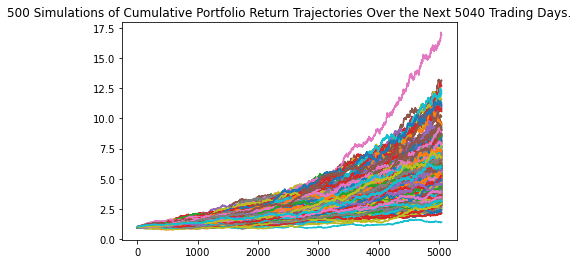

In [12]:
# Line plot for conservative monte carlo sim
line_plot_cons = MC_conservative.plot_simulation()

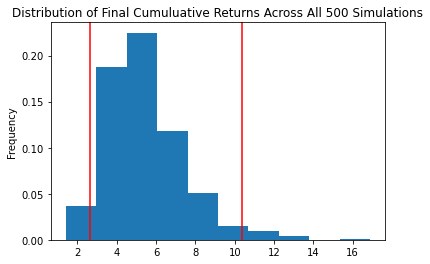

In [13]:
# Distribution plot for conservative monte carlo sim
dist_plot_cons = MC_conservative.plot_distribution()

In [14]:
# Summary statistics
tbl_conservative = MC_conservative.summarize_cumulative_return()
print(tbl_conservative)

count           500.000000
mean              5.434024
std               1.976094
min               1.405198
25%               4.041536
50%               5.126543
75%               6.499021
max              16.887518
95% CI Lower      2.653628
95% CI Upper     10.387537
Name: 5040, dtype: float64


### Run monte carlo simulation on moderate portfolio

In [15]:
# Set timeframe to 1 day
timeframe = "1D"

# Set start and end dates
start_date = pd.Timestamp('2015-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-11-10', tz='America/New_York').isoformat()

# Get 6 years worth of price data
moderate_data = api.get_barset(
    moderate_tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

In [16]:
# Clean data
moderate_data = moderate_data.dropna()
moderate_data.head()

BND                                       VB  \
                            open   high     low  close     volume    open   
time                                                                        
2017-11-21 00:00:00-05:00  81.73  81.79  81.613  81.69  1804500.0  144.74   
2017-11-22 00:00:00-05:00  81.73  81.89  81.715  81.88  1440389.0  145.71   
2017-11-24 00:00:00-05:00  81.84  81.88  81.810  81.83   786816.0  145.95   
2017-11-27 00:00:00-05:00  81.87  81.89  81.785  81.82  1291927.0  145.88   
2017-11-28 00:00:00-05:00  81.90  81.95  81.830  81.84  1726448.0  145.52   

                                                                 ...    VWO  \
                               high       low   close    volume  ...   open   
time                                                             ...          
2017-11-21 00:00:00-05:00  145.5000  144.7400  145.50  561930.0  ...  45.59   
2017-11-22 00:00:00-05:00  145.9999  145.3901  145.42  268542.0  ...  45.76   
2017-11-24 00:00:00-05:00  145.9500  145.4372  145.58  102718.0  ...  45.53   
2017-11-27 00:00:00-05:00  145.8800  145.0700  145.07  416405.0  ...  45.38   
2017-11-28 00:00:00-05:00  146.9100  145.2801  146.87  245509.0  ...  45.39   

                                                               VXUS         \
                            high      low  close      volume   open   high   
time                                                                         
2017-11-21 00:00:00-05:00  45.81  45.5600  45.63   9092784.0  56.10  56.30   
2017-11-22 00:00:00-05:00  45.84  45.5935  45.75   6993352.0  56.51  56.53   
2017-11-24 00:00:00-05:00  45.66  45.5000  45.59   6225165.0  56.71  56.75   
2017-11-27 00:00:00-05:00  45.40  45.0900  45.11   9015959.0  56.59  56.59   
2017-11-28 00:00:00-05:00  45.54  45.2300  45.40  10536681.0  56.53  56.64   

                                                      
                               low  close     volume  
time                                                  
2017-11-21 00:00:00-05:00  56.1000  56.23   441686.0  
2017-11-22 00:00:00-05:00  56.2250  56.40   590055.0  
2017-11-24 00:00:00-05:00  56.6267  56.69   204673.0  
2017-11-27 00:00:00-05:00  56.2600  56.28   576413.0  
2017-11-28 00:00:00-05:00  56.4000  56.60  1325631.0  

[5 rows x 25 columns]

In [17]:
# Define monte carlo sim for moderate portfolio
MC_mod = MCSimulation(
    portfolio_data = moderate_data,
    weights = mod_weights,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [18]:
# Run monte carlo sim 
MC_mod.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/brando/Desktop/Final-Project-1-main/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1      1.008148  1.010404  0.996817  1.009936  1.003050  1.001558  1.006124   
2      1.004807  1.015192  0.988119  1.009158  1.013662  1.006477  1.011277   
3      1.004535  1.020455  0.986510  1.018381  1.009365  1.006731  1.010589   
4      1.008045  1.024313  0.990812  1.016423  1.012566  1.002902  1.002409   
...         ...       ...       ...       ...       ...       ...       ...   
5036  11.653861  5.689995  8.950621  7.434176  8.387355  5.049419  6.415157   
5037  11.710829  5.715910  8.999846  7.393132  8.393862  5.058812  6.365853   
5038  11.785916  5.740511  8.947776  7.399769  8.414913  5.089056  6.383183   
5039  11.760842  5.734514  9.010565  7.465568  8.504045  5.141658  6.423787   
5040  11.792426  5.757781  9.051746  7.453979  8.554361  5.146450  6.419334   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.999735  0.999840  0.999444  ...  1.002552  0.997648  0.998034   
2     0.998851  0.993023  1.007403  ...  1.002127  0.998060  1.006641   
3     0.994019  0.991385  0.999822  ...  1.006258  0.999809  0.996219   
4     0.998404  0.987888  1.010602  ...  1.013620  0.996471  0.996542   
...        ...       ...       ...  ...       ...       ...       ...   
5036  6.102550  6.441797  4.311185  ...  4.655123  4.327389  2.714794   
5037  6.124225  6.453683  4.303810  ...  4.686747  4.322775  2.710372   
5038  6.086708  6.501836  4.294571  ...  4.686223  4.300060  2.727769   
5039  6.083889  6.495573  4.286871  ...  4.656809  4.336016  2.733107   
5040  6.012586  6.469668  4.293220  ...  4.672945  4.395674  2.697401   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.990233  1.004109  1.003505  1.000301  0.999862  0.996263  0.993372  
2     0.996784  0.998156  1.009731  1.004042  1.003333  0.991027  0.992168  
3     0.987956  1.010851  0.999352  1.001579  0.998643  0.989231  0.992936  
4     0.994573  1.016180  1.005656  1.007483  0.995536  0.985866  0.990520  
...        ...       ...       ...       ...       ...       ...       ...  
5036  4.680330  3.943339  4.961491  8.146111  5.341787  4.122030  7.604518  
5037  4.633559  3.934197  4.952475  8.094051  5.365322  4.087261  7.557951  
5038  4.662603  3.906238  4.896047  8.087282  5.307567  4.106337  7.470615  
5039  4.675412  3.920900  4.916839  8.062772  5.333031  4.087381  7.407483  
5040  4.710168  3.942347  4.958384  7.981062  5.308513  4.120780  7.339023  

[5041 rows x 500 columns]

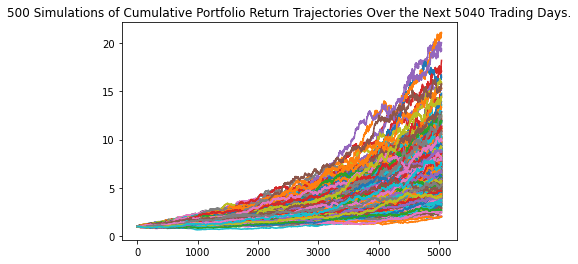

In [19]:
# Line plot for moderate monte carlo sim
line_plot_mod = MC_mod.plot_simulation()

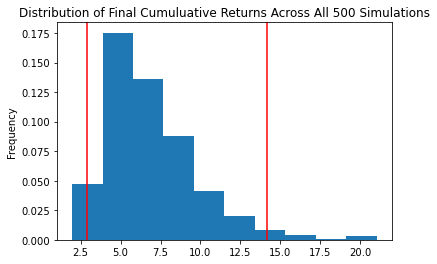

In [20]:
# Distribution plot
dist_plot_mod = MC_mod.plot_distribution()

In [21]:
# Summary statistics
tbl_moderate = MC_mod.summarize_cumulative_return()
print(tbl_moderate)

count           500.000000
mean              6.893054
std               2.905248
min               1.966687
25%               4.861884
50%               6.317271
75%               8.279624
max              21.030415
95% CI Lower      2.880405
95% CI Upper     14.155105
Name: 5040, dtype: float64


### Run monte carlo simulation on aggressive portfolio 

In [22]:
# Set timeframe to 1 day
timeframe = "1D"

# Set start and end dates
start_date = pd.Timestamp('2015-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-11-10', tz='America/New_York').isoformat()

# Get 6 years worth of price data
aggressive_data = api.get_barset(
    aggressive_tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df


In [23]:
# Clean data
aggressive_data = aggressive_data.dropna()
aggressive_data.head()

BND                                       VB  \
                            open   high     low  close     volume    open   
time                                                                        
2017-11-21 00:00:00-05:00  81.73  81.79  81.613  81.69  1804500.0  144.74   
2017-11-22 00:00:00-05:00  81.73  81.89  81.715  81.88  1440389.0  145.71   
2017-11-24 00:00:00-05:00  81.84  81.88  81.810  81.83   786816.0  145.95   
2017-11-27 00:00:00-05:00  81.87  81.89  81.785  81.82  1291927.0  145.88   
2017-11-28 00:00:00-05:00  81.90  81.95  81.830  81.84  1726448.0  145.52   

                                                                 ...    VWO  \
                               high       low   close    volume  ...   open   
time                                                             ...          
2017-11-21 00:00:00-05:00  145.5000  144.7400  145.50  561930.0  ...  45.59   
2017-11-22 00:00:00-05:00  145.9999  145.3901  145.42  268542.0  ...  45.76   
2017-11-24 00:00:00-05:00  145.9500  145.4372  145.58  102718.0  ...  45.53   
2017-11-27 00:00:00-05:00  145.8800  145.0700  145.07  416405.0  ...  45.38   
2017-11-28 00:00:00-05:00  146.9100  145.2801  146.87  245509.0  ...  45.39   

                                                               VXUS         \
                            high      low  close      volume   open   high   
time                                                                         
2017-11-21 00:00:00-05:00  45.81  45.5600  45.63   9092784.0  56.10  56.30   
2017-11-22 00:00:00-05:00  45.84  45.5935  45.75   6993352.0  56.51  56.53   
2017-11-24 00:00:00-05:00  45.66  45.5000  45.59   6225165.0  56.71  56.75   
2017-11-27 00:00:00-05:00  45.40  45.0900  45.11   9015959.0  56.59  56.59   
2017-11-28 00:00:00-05:00  45.54  45.2300  45.40  10536681.0  56.53  56.64   

                                                      
                               low  close     volume  
time                                                  
2017-11-21 00:00:00-05:00  56.1000  56.23   441686.0  
2017-11-22 00:00:00-05:00  56.2250  56.40   590055.0  
2017-11-24 00:00:00-05:00  56.6267  56.69   204673.0  
2017-11-27 00:00:00-05:00  56.2600  56.28   576413.0  
2017-11-28 00:00:00-05:00  56.4000  56.60  1325631.0  

[5 rows x 25 columns]

In [24]:
# Define Monte carlo sim for aggressive portfolio
MC_agg = MCSimulation(
    portfolio_data = aggressive_data,
    weights = agg_weights,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [25]:
# Run monte carlo
MC_agg.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/brando/Desktop/Final-Project-1-main/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3          4          5          6    \
0     1.000000  1.000000  1.000000  1.000000   1.000000   1.000000   1.000000   
1     0.996732  0.999821  1.001517  0.994802   1.007666   1.006102   0.991840   
2     0.990033  1.005338  1.001061  0.993531   1.013351   0.999101   0.983764   
3     0.996540  1.008697  1.005789  0.995145   1.016892   1.000775   0.992570   
4     1.004601  1.013289  1.000911  0.999824   1.013930   0.995006   0.992819   
...        ...       ...       ...       ...        ...        ...        ...   
5036  5.515533  7.827150  8.354968  7.043784  10.838637  11.368005  14.162456   
5037  5.465862  7.898303  8.312837  7.097650  10.906138  11.292063  14.078346   
5038  5.506506  7.873054  8.460087  7.035952  11.099429  11.197210  14.077091   
5039  5.502220  7.960051  8.427033  7.009346  11.137430  11.245082  14.014273   
5040  5.431766  7.966591  8.350171  6.972040  11.182488  11.195557  14.068024   

           7         8          9    ...       490        491       492  \
0     1.000000  1.000000   1.000000  ...  1.000000   1.000000  1.000000   
1     1.004875  0.995634   1.010278  ...  1.002928   1.016504  1.000430   
2     1.003029  0.997552   0.998817  ...  1.003206   1.008629  1.003079   
3     0.995438  0.985151   0.989686  ...  1.014231   0.998128  1.012151   
4     0.994433  0.972628   0.998147  ...  1.016475   1.003079  1.007779   
...        ...       ...        ...  ...       ...        ...       ...   
5036  5.776550  9.323846  10.674836  ...  5.510430  10.345607  7.166994   
5037  5.728746  9.367843  10.748824  ...  5.510482  10.357721  7.115472   
5038  5.711898  9.314612  10.773751  ...  5.525518  10.285600  7.097509   
5039  5.714543  9.443930  10.798853  ...  5.535350  10.331717  7.100498   
5040  5.733667  9.480245  10.836216  ...  5.552922  10.429859  7.070897   

            493       494       495       496        497       498       499  
0      1.000000  1.000000  1.000000  1.000000   1.000000  1.000000  1.000000  
1      1.000821  1.007587  0.995591  0.990313   0.994999  0.998189  0.994193  
2      0.997075  1.000804  0.999115  0.999274   1.001177  0.991833  1.000886  
3      0.993205  0.981997  0.999521  0.987931   0.998651  0.988878  1.000163  
4      0.993956  0.984503  1.008095  0.988540   1.003771  0.989139  0.996747  
...         ...       ...       ...       ...        ...       ...       ...  
5036  16.501995  9.359838  9.142867  9.637327  10.808707  6.877111  6.762410  
5037  16.525060  9.457291  9.057445  9.614582  10.659662  6.977966  6.830644  
5038  16.585463  9.464371  9.096718  9.586916  10.470447  6.923624  6.767601  
5039  16.688258  9.485339  9.079138  9.464469  10.489296  6.867530  6.709833  
5040  16.700231  9.456514  9.018064  9.453864  10.372310  6.860526  6.759330  

[5041 rows x 500 columns]

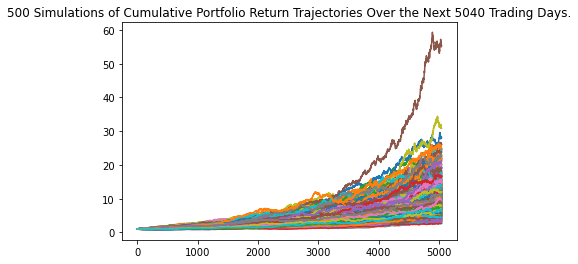

In [26]:
# Line plot for aggressive portfolio
line_plot_agg = MC_agg.plot_simulation()

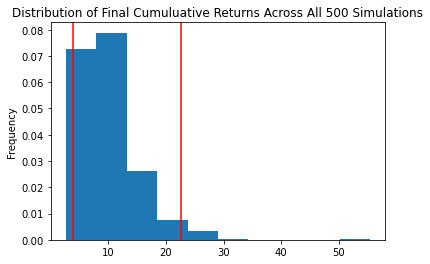

In [27]:
# Distribution plot
dist_plot_agg = MC_agg.plot_distribution()

In [28]:
# Summary Statistics
tbl_agg = MC_agg.summarize_cumulative_return()
print(tbl_agg)

count           500.000000
mean             10.140738
std               5.049653
min               2.664456
25%               6.758925
50%               9.173719
75%              12.099847
max              55.417072
95% CI Lower      3.892590
95% CI Upper     22.716042
Name: 5040, dtype: float64


### Find cumulative returns for Conservative portfolio since Jan 1, 2015

In [29]:
# Define weights and assets
conservative_tickers = ['BIV', 'BSV,' 'VB', 'VV', 'VXUS']
cons_weights = [.4, .1, .2 ,.25, .05]

In [30]:
# Delete extraneous columns 
cons_returns = conservative_data.drop([(
    'BIV', 'open'),
    ('BIV', 'high'),
    ('BIV', 'low'),
    ('BIV', 'volume'),
    ('BSV', 'open'),
    ('BSV', 'high'),
    ('BSV', 'low'),
    ('BSV', 'volume'),
    ('VXUS', 'open'),
    ('VXUS', 'high'),
    ('VXUS', 'low'),
    ('VXUS', 'volume'),
    ('VV', 'open'),
    ('VV', 'high'),
    ('VV', 'low'),
    ('VV', 'volume'),    
    ('VB', 'open'),
    ('VB', 'high'),
    ('VB', 'low'),
    ('VB', 'volume')
], axis = 1, inplace = True)

In [31]:
# Delete extraneous columns
cons_returns = conservative_data.rename(columns = {'BIV':'', 'BSV':'', 'VB':'', 'VV':'', 'VXUS':''})
cons_returns.head()

close   close   close   close  close
time                                                           
2017-11-21 00:00:00-05:00  84.21  79.360  145.50  119.42  56.23
2017-11-22 00:00:00-05:00  84.42  79.470  145.42  119.36  56.40
2017-11-24 00:00:00-05:00  84.38  79.445  145.58  119.61  56.69
2017-11-27 00:00:00-05:00  84.43  79.465  145.07  119.63  56.28
2017-11-28 00:00:00-05:00  84.49  79.460  146.87  120.71  56.60

In [32]:
# Rename columns
cons_returns.columns = ['BIV', 'BSV', 'VB', 'VV', 'VZUS']

In [33]:
# Find percentage change
cons_returns = cons_returns.pct_change()
cons_returns.head()

BIV       BSV        VB        VV      VZUS
time                                                                       
2017-11-21 00:00:00-05:00       NaN       NaN       NaN       NaN       NaN
2017-11-22 00:00:00-05:00  0.002494  0.001386 -0.000550 -0.000502  0.003023
2017-11-24 00:00:00-05:00 -0.000474 -0.000315  0.001100  0.002095  0.005142
2017-11-27 00:00:00-05:00  0.000593  0.000252 -0.003503  0.000167 -0.007232
2017-11-28 00:00:00-05:00  0.000711 -0.000063  0.012408  0.009028  0.005686

In [34]:
# Calculate cummulative return
conservative_returns_combined = cons_returns.dot(cons_weights)

In [35]:
# Find overal portfolio returns
conservative_returns_combined

time
2017-11-21 00:00:00-05:00         NaN
2017-11-22 00:00:00-05:00    0.001052
2017-11-24 00:00:00-05:00    0.000780
2017-11-27 00:00:00-05:00   -0.000758
2017-11-28 00:00:00-05:00    0.005301
                               ...   
2021-11-04 00:00:00-04:00    0.002031
2021-11-05 00:00:00-04:00    0.004749
2021-11-08 00:00:00-05:00   -0.000513
2021-11-09 00:00:00-05:00   -0.000101
2021-11-10 00:00:00-05:00   -0.008831
Length: 999, dtype: float64

<AxesSubplot:title={'center':'Conservative portfolio daily returns'}, xlabel='Date', ylabel='Daily Return'>

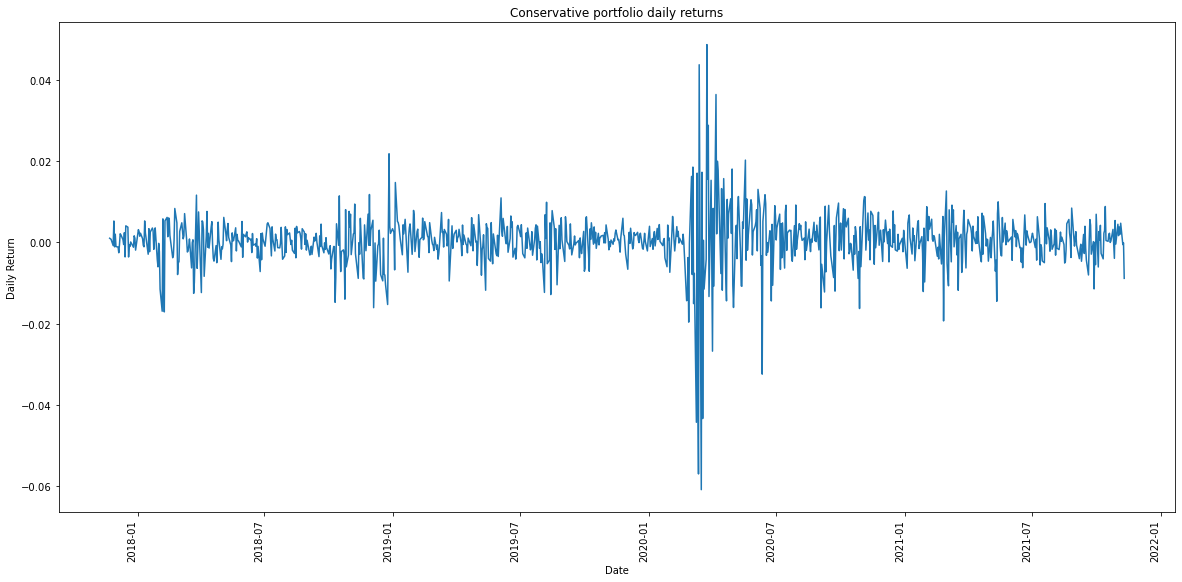

In [36]:
# Plot conservative returns
conservative_returns_combined.plot(xlabel = "Date", ylabel = "Daily Return", rot=90, figsize = [20,10], title = "Conservative portfolio daily returns")

In [37]:
# Find cumulative returns for conservative portfolio and plot
conservative_cumulative_returns = (1 + conservative_returns_combined).cumprod() - 1
conservative_cumulative_returns_plot = conservative_cumulative_returns.hvplot(title = "Conservative Portfolio Returns", xlabel = "Date", ylabel = "% Return")
conservative_cumulative_returns_plot

:Curve   [time]   (0)

In [38]:
conservative_cumulative_returns

time
2017-11-21 00:00:00-05:00         NaN
2017-11-22 00:00:00-05:00    0.001052
2017-11-24 00:00:00-05:00    0.001832
2017-11-27 00:00:00-05:00    0.001073
2017-11-28 00:00:00-05:00    0.006379
                               ...   
2021-11-04 00:00:00-04:00    0.362193
2021-11-05 00:00:00-04:00    0.368662
2021-11-08 00:00:00-05:00    0.367960
2021-11-09 00:00:00-05:00    0.367822
2021-11-10 00:00:00-05:00    0.355743
Length: 999, dtype: float64

### Find cumulative returns for moderate portfolio since Jan 1, 2015

In [39]:
# Define assets and weights
moderate_tickers = ['BND', 'VB', 'VV', 'VWO', 'VXUS']
mod_weights = [.3, .25, .25, .05, .15]
moderate_data.head()

BND                                       VB  \
                            open   high     low  close     volume    open   
time                                                                        
2017-11-21 00:00:00-05:00  81.73  81.79  81.613  81.69  1804500.0  144.74   
2017-11-22 00:00:00-05:00  81.73  81.89  81.715  81.88  1440389.0  145.71   
2017-11-24 00:00:00-05:00  81.84  81.88  81.810  81.83   786816.0  145.95   
2017-11-27 00:00:00-05:00  81.87  81.89  81.785  81.82  1291927.0  145.88   
2017-11-28 00:00:00-05:00  81.90  81.95  81.830  81.84  1726448.0  145.52   

                                                                 ...    VWO  \
                               high       low   close    volume  ...   open   
time                                                             ...          
2017-11-21 00:00:00-05:00  145.5000  144.7400  145.50  561930.0  ...  45.59   
2017-11-22 00:00:00-05:00  145.9999  145.3901  145.42  268542.0  ...  45.76   
2017-11-24 00:00:00-05:00  145.9500  145.4372  145.58  102718.0  ...  45.53   
2017-11-27 00:00:00-05:00  145.8800  145.0700  145.07  416405.0  ...  45.38   
2017-11-28 00:00:00-05:00  146.9100  145.2801  146.87  245509.0  ...  45.39   

                                                               VXUS         \
                            high      low  close      volume   open   high   
time                                                                         
2017-11-21 00:00:00-05:00  45.81  45.5600  45.63   9092784.0  56.10  56.30   
2017-11-22 00:00:00-05:00  45.84  45.5935  45.75   6993352.0  56.51  56.53   
2017-11-24 00:00:00-05:00  45.66  45.5000  45.59   6225165.0  56.71  56.75   
2017-11-27 00:00:00-05:00  45.40  45.0900  45.11   9015959.0  56.59  56.59   
2017-11-28 00:00:00-05:00  45.54  45.2300  45.40  10536681.0  56.53  56.64   

                                                      
                               low  close     volume  
time                                                  
2017-11-21 00:00:00-05:00  56.1000  56.23   441686.0  
2017-11-22 00:00:00-05:00  56.2250  56.40   590055.0  
2017-11-24 00:00:00-05:00  56.6267  56.69   204673.0  
2017-11-27 00:00:00-05:00  56.2600  56.28   576413.0  
2017-11-28 00:00:00-05:00  56.4000  56.60  1325631.0  

[5 rows x 25 columns]

In [40]:
# Drop extraneous columns
moderate_returns = moderate_data.drop([(
    'VV', 'open'),
    ('VV', 'high'),
    ('VV', 'low'),
    ('VV', 'volume'),
    ('VB', 'open'),
    ('VB', 'high'),
    ('VB', 'low'),
    ('VB', 'volume'),
    ('VXUS', 'open'),
    ('VXUS', 'high'),
    ('VXUS', 'low'),
    ('VXUS', 'volume'),
    ('VWO', 'open'),
    ('VWO', 'high'),
    ('VWO', 'low'),
    ('VWO', 'volume'),    
    ('BND', 'open'),
    ('BND', 'high'),
    ('BND', 'low'),
    ('BND', 'volume')
], axis = 1, inplace = True)

In [41]:
# Drop extraneous columns
moderate_returns = moderate_data.rename(columns = {'VV':'', 'VB':'', 'VXUS':'', 'VWO':'', 'BND':''})

In [42]:
# Rename columns
moderate_returns.columns = ['VV', 'VB', 'VXUS', 'VWO', 'BND']
moderate_returns.head()

VV      VB    VXUS    VWO    BND
time                                                          
2017-11-21 00:00:00-05:00  81.69  145.50  119.42  45.63  56.23
2017-11-22 00:00:00-05:00  81.88  145.42  119.36  45.75  56.40
2017-11-24 00:00:00-05:00  81.83  145.58  119.61  45.59  56.69
2017-11-27 00:00:00-05:00  81.82  145.07  119.63  45.11  56.28
2017-11-28 00:00:00-05:00  81.84  146.87  120.71  45.40  56.60

In [43]:
# Find percentage change of moderate portfolio
moderate_returns = moderate_returns.pct_change()

In [44]:
# Find total portfolio returns and plot
moderate_returns_combined = moderate_returns.dot(mod_weights)

<AxesSubplot:title={'center':'Moderate Portfolio Daily Returns'}, xlabel='Date', ylabel='Daily Return'>

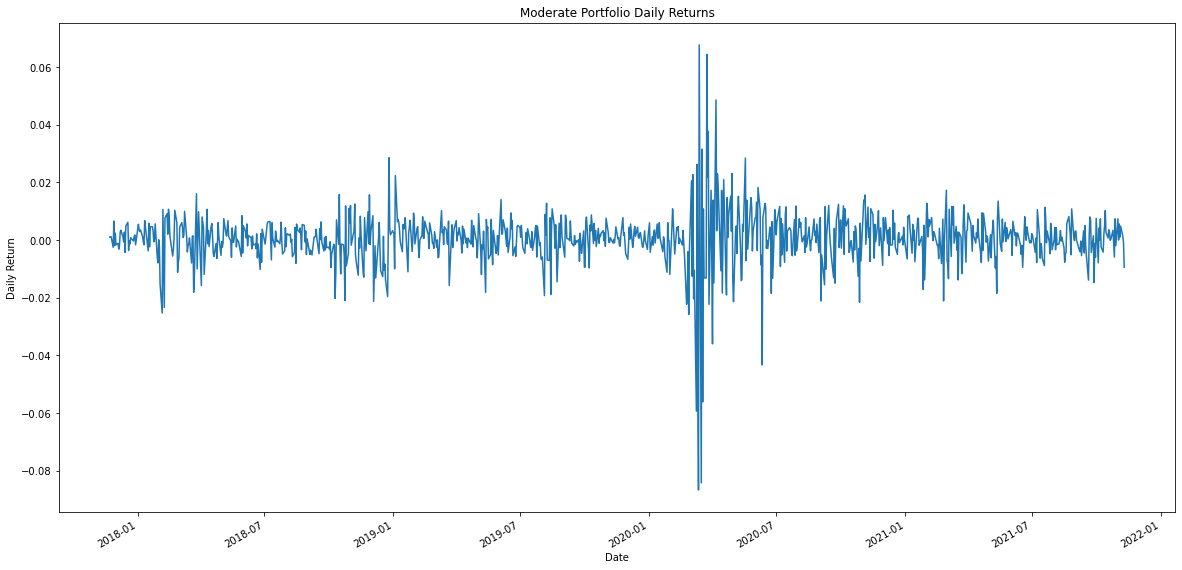

In [45]:
moderate_returns_combined.plot(title = "Moderate Portfolio Daily Returns", figsize = [20,10], xlabel = "Date", ylabel = "Daily Return")

In [46]:
# Find cumulative returns of moderate portfolio 
moderate_cumulative_returns = (1 + moderate_returns_combined).cumprod() - 1
moderate_cumulative_returns

time
2017-11-21 00:00:00-05:00         NaN
2017-11-22 00:00:00-05:00    0.001020
2017-11-24 00:00:00-05:00    0.002233
2017-11-27 00:00:00-05:00   -0.000255
2017-11-28 00:00:00-05:00    0.006350
                               ...   
2021-11-04 00:00:00-04:00    0.404534
2021-11-05 00:00:00-04:00    0.411292
2021-11-08 00:00:00-05:00    0.413133
2021-11-09 00:00:00-05:00    0.411840
2021-11-10 00:00:00-05:00    0.398518
Length: 998, dtype: float64

In [47]:
moderate_cumulative_returns_plot = moderate_cumulative_returns.hvplot(title = "Moderate Portfolio Returns", xlabel = "Date", ylabel = "% Return")
moderate_cumulative_returns_plot

:Curve   [time]   (0)

In [48]:
# Define assets and weights
aggressive_tickers = ['BND', 'VB', 'VV', 'VWO', 'VXUS']
agg_weights = [.1, .30, .30 ,.1, .2]
aggressive_data.head()

BND                                       VB  \
                            open   high     low  close     volume    open   
time                                                                        
2017-11-21 00:00:00-05:00  81.73  81.79  81.613  81.69  1804500.0  144.74   
2017-11-22 00:00:00-05:00  81.73  81.89  81.715  81.88  1440389.0  145.71   
2017-11-24 00:00:00-05:00  81.84  81.88  81.810  81.83   786816.0  145.95   
2017-11-27 00:00:00-05:00  81.87  81.89  81.785  81.82  1291927.0  145.88   
2017-11-28 00:00:00-05:00  81.90  81.95  81.830  81.84  1726448.0  145.52   

                                                                 ...    VWO  \
                               high       low   close    volume  ...   open   
time                                                             ...          
2017-11-21 00:00:00-05:00  145.5000  144.7400  145.50  561930.0  ...  45.59   
2017-11-22 00:00:00-05:00  145.9999  145.3901  145.42  268542.0  ...  45.76   
2017-11-24 00:00:00-05:00  145.9500  145.4372  145.58  102718.0  ...  45.53   
2017-11-27 00:00:00-05:00  145.8800  145.0700  145.07  416405.0  ...  45.38   
2017-11-28 00:00:00-05:00  146.9100  145.2801  146.87  245509.0  ...  45.39   

                                                               VXUS         \
                            high      low  close      volume   open   high   
time                                                                         
2017-11-21 00:00:00-05:00  45.81  45.5600  45.63   9092784.0  56.10  56.30   
2017-11-22 00:00:00-05:00  45.84  45.5935  45.75   6993352.0  56.51  56.53   
2017-11-24 00:00:00-05:00  45.66  45.5000  45.59   6225165.0  56.71  56.75   
2017-11-27 00:00:00-05:00  45.40  45.0900  45.11   9015959.0  56.59  56.59   
2017-11-28 00:00:00-05:00  45.54  45.2300  45.40  10536681.0  56.53  56.64   

                                                      
                               low  close     volume  
time                                                  
2017-11-21 00:00:00-05:00  56.1000  56.23   441686.0  
2017-11-22 00:00:00-05:00  56.2250  56.40   590055.0  
2017-11-24 00:00:00-05:00  56.6267  56.69   204673.0  
2017-11-27 00:00:00-05:00  56.2600  56.28   576413.0  
2017-11-28 00:00:00-05:00  56.4000  56.60  1325631.0  

[5 rows x 25 columns]

In [49]:
# Drop extraneous columns
aggressive_returns = aggressive_data.drop([(
    'BND', 'open'),
    ('BND', 'high'),
    ('BND', 'low'),
    ('BND', 'volume'),
    ('VB', 'open'),
    ('VB', 'high'),
    ('VB', 'low'),
    ('VB', 'volume'),
    ('VV', 'open'),
    ('VV', 'high'),
    ('VV', 'low'),
    ('VV', 'volume'),
    ('VWO', 'open'),
    ('VWO', 'high'),
    ('VWO', 'low'),
    ('VWO', 'volume'),    
    ('VXUS', 'open'),
    ('VXUS', 'high'),
    ('VXUS', 'low'),
    ('VXUS', 'volume')
], axis = 1, inplace = True)


In [50]:
# Drop extraneous columns
aggressive_returns = aggressive_data.rename(columns = {'VV':'', 'VB':'', 'VXUS':'', 'VWO':'', 'BND':''})

In [51]:
# Rename columns
aggressive_returns.columns = ['BND', 'VB', 'VV', 'VWO', 'VXUS']
aggressive_returns.head()

BND      VB      VV    VWO   VXUS
time                                                          
2017-11-21 00:00:00-05:00  81.69  145.50  119.42  45.63  56.23
2017-11-22 00:00:00-05:00  81.88  145.42  119.36  45.75  56.40
2017-11-24 00:00:00-05:00  81.83  145.58  119.61  45.59  56.69
2017-11-27 00:00:00-05:00  81.82  145.07  119.63  45.11  56.28
2017-11-28 00:00:00-05:00  81.84  146.87  120.71  45.40  56.60

In [52]:
# Find returns of aggressive portfolio
aggressive_returns = aggressive_returns.pct_change()

In [53]:
# Find returns for total portfolio and plot
aggressive_returns_combined = aggressive_returns.dot(agg_weights)

In [54]:
aggressive_returns_combined.head()

time
2017-11-21 00:00:00-05:00         NaN
2017-11-22 00:00:00-05:00    0.000785
2017-11-24 00:00:00-05:00    0.001576
2017-11-27 00:00:00-05:00   -0.003512
2017-11-28 00:00:00-05:00    0.008235
dtype: float64

<AxesSubplot:title={'center':'Aggressive Portfolio Daily Returns'}, xlabel='Date', ylabel='Daily Return'>

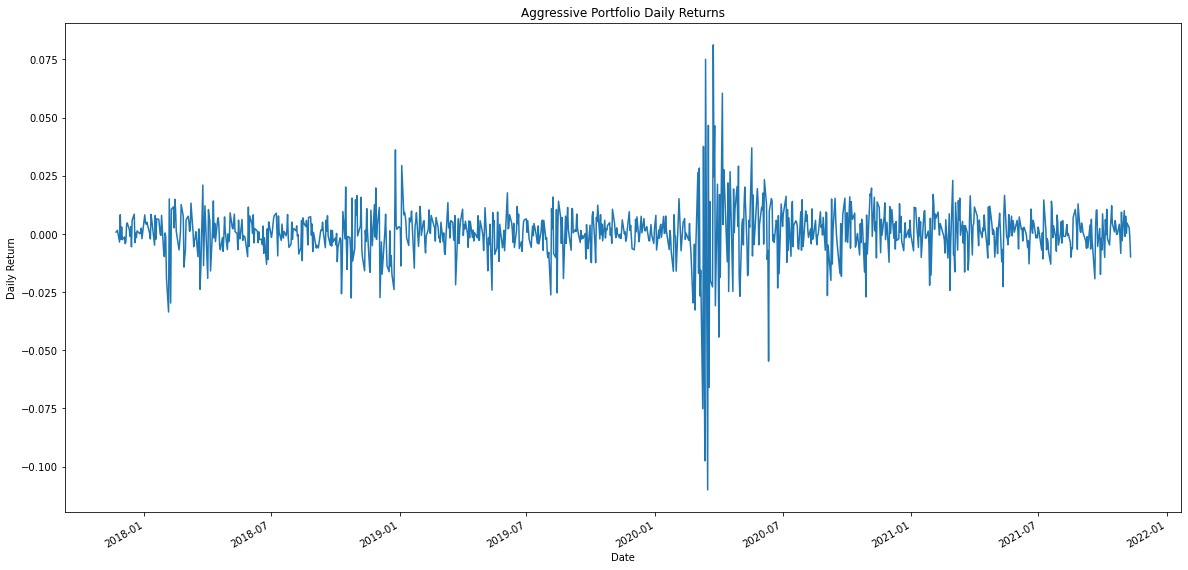

In [55]:
aggressive_returns_combined.plot(title = "Aggressive Portfolio Daily Returns", figsize = [20,10], xlabel = "Date", ylabel = "Daily Return")

In [56]:
# Find cumulative returns of aggressive portfolio and plot
aggressive_cumulative_returns = (1 + aggressive_returns_combined).cumprod() - 1
aggressive_cumulative_returns

time
2017-11-21 00:00:00-05:00         NaN
2017-11-22 00:00:00-05:00    0.000785
2017-11-24 00:00:00-05:00    0.002362
2017-11-27 00:00:00-05:00   -0.001159
2017-11-28 00:00:00-05:00    0.007067
                               ...   
2021-11-04 00:00:00-04:00    0.476878
2021-11-05 00:00:00-04:00    0.483819
2021-11-08 00:00:00-05:00    0.487715
2021-11-09 00:00:00-05:00    0.484718
2021-11-10 00:00:00-05:00    0.470085
Length: 998, dtype: float64

In [57]:
aggressive_returns_combined_plot = aggressive_cumulative_returns.hvplot(title = "Aggressive Portfolio Returns", xlabel = "Date", ylabel = "% Return")
aggressive_returns_combined_plot

:Curve   [time]   (0)

In [58]:
all_crypto_portfolios_plot = conservative_cumulative_returns.hvplot() * moderate_cumulative_returns.hvplot() * aggressive_cumulative_returns.hvplot()
all_crypto_portfolios_plot

:Overlay
   .Curve.A_0.I   :Curve   [time]   (0)
   .Curve.A_0.II  :Curve   [time]   (0)
   .Curve.A_0.III :Curve   [time]   (0)

## Portfolio Beta. Find and plot Beta and Sharpe Ratios for all portfolios

In [59]:
# Call conservative portfolio csv
cons_csv = Path("conservative_portfolio.csv")
conservative_csv = pd.read_csv(cons_csv, index_col="Date")
conservative_csv

BIV    BSV      VB      VV   VXUS
Date                                                
1/2/2015 16:00   84.87  79.95  116.28   94.31  48.21
1/5/2015 16:00   85.19  80.02  114.49   92.69  47.15
1/6/2015 16:00   85.57  80.09  113.03   91.79  46.79
1/7/2015 16:00   85.60  80.16  114.39   92.83  47.34
1/8/2015 16:00   85.44  80.17  116.21   94.58  47.94
...                ...    ...     ...     ...    ...
11/3/2021 16:00  88.77  81.47  237.49  217.62  65.81
11/4/2021 16:00  89.07  81.57  236.45  218.55  65.74
11/5/2021 16:00  89.49  81.66  238.81  219.18  65.88
11/8/2021 16:00  89.16  81.52  239.37  219.63  66.09
11/9/2021 16:00  89.41  81.58  238.74  218.94  65.89

[1727 rows x 5 columns]

In [60]:
# Call SP500 closing data csv
sp500_csv = Path('sp500.csv')
sp500_data = pd.read_csv(sp500_csv, index_col = "Date")
sp500_change= sp500_data.pct_change()
sp500_change

Close
Date                     
1/2/2015 16:00        NaN
1/5/2015 16:00  -0.018278
1/6/2015 16:00  -0.008893
1/7/2015 16:00   0.011630
1/8/2015 16:00   0.017888
...                   ...
11/3/2021 16:00  0.006461
11/4/2021 16:00  0.004182
11/5/2021 16:00  0.003733
11/8/2021 16:00  0.000888
11/9/2021 16:00 -0.003499

[1727 rows x 1 columns]

In [61]:
# Find the daily percent change of the conservative portfolio
conservative_change= conservative_csv.pct_change()
conservative_change

BIV       BSV        VB        VV      VXUS
Date                                                             
1/2/2015 16:00        NaN       NaN       NaN       NaN       NaN
1/5/2015 16:00   0.003770  0.000876 -0.015394 -0.017177 -0.021987
1/6/2015 16:00   0.004461  0.000875 -0.012752 -0.009710 -0.007635
1/7/2015 16:00   0.000351  0.000874  0.012032  0.011330  0.011755
1/8/2015 16:00  -0.001869  0.000125  0.015910  0.018852  0.012674
...                   ...       ...       ...       ...       ...
11/3/2021 16:00 -0.001350 -0.000123  0.013053  0.006615  0.006577
11/4/2021 16:00  0.003380  0.001227 -0.004379  0.004274 -0.001064
11/5/2021 16:00  0.004715  0.001103  0.009981  0.002883  0.002130
11/8/2021 16:00 -0.003688 -0.001714  0.002345  0.002053  0.003188
11/9/2021 16:00  0.002804  0.000736 -0.002632 -0.003142 -0.003026

[1727 rows x 5 columns]

In [62]:
# Find total conservative portfolio returns
cons_weights = [.4, .1, .2 ,.25, .05]
conservative_returns_combined = conservative_change.dot(cons_weights)
conservative_returns_combined

Date
1/2/2015 16:00          NaN
1/5/2015 16:00    -0.006877
1/6/2015 16:00    -0.003488
1/7/2015 16:00     0.006054
1/8/2015 16:00     0.007794
                     ...   
11/3/2021 16:00    0.004041
11/4/2021 16:00    0.001614
11/5/2021 16:00    0.004820
11/8/2021 16:00   -0.000505
11/9/2021 16:00   -0.000268
Length: 1727, dtype: float64

In [63]:
# Find conservative covariance
conservative_covariance = conservative_returns_combined.cov(sp500_change['Close'])
conservative_covariance

6.28011831581337e-05

In [64]:
mod_csv = Path("moderate_portfolio.csv")
moderate_csv = pd.read_csv(mod_csv, index_col="Date")

In [65]:
moderate_change= moderate_csv.pct_change()

In [66]:
# Find total moderate portfolio returns
mod_weights = [.3, .25, .25, .05, .15]
moderate_returns_combined = moderate_change.dot(mod_weights)
moderate_returns_combined

Date
1/2/2015 16:00          NaN
1/5/2015 16:00    -0.011366
1/6/2015 16:00    -0.006136
1/7/2015 16:00     0.008933
1/8/2015 16:00     0.010968
                     ...   
11/3/2021 16:00    0.005742
11/4/2021 16:00    0.001080
11/5/2021 16:00    0.004466
11/8/2021 16:00    0.001434
11/9/2021 16:00   -0.001173
Length: 1727, dtype: float64

In [67]:
# Find moderate covariance
moderate_covariance = moderate_returns_combined.cov(sp500_change['Close'])
moderate_covariance

8.86339291576764e-05

In [68]:
# Find total aggresive portfolio returns
agg_weights = [.1, .30, .30 ,.1, .2]
aggressive_returns_combined = moderate_change.dot(agg_weights)
aggressive_returns_combined

Date
1/2/2015 16:00          NaN
1/5/2015 16:00    -0.015471
1/6/2015 16:00    -0.008464
1/7/2015 16:00     0.011717
1/8/2015 16:00     0.014498
                     ...   
11/3/2021 16:00    0.007771
11/4/2021 16:00   -0.000002
11/5/2021 16:00    0.004628
11/8/2021 16:00    0.002777
11/9/2021 16:00   -0.002290
Length: 1727, dtype: float64

In [69]:
# Find aggressive covariance
aggressive_covariance = aggressive_returns_combined.cov(sp500_change['Close'])
aggressive_covariance

0.0001130353653598525

In [70]:
# Calculate the variance of the SP500
variance = sp500_change['Close'].var()
variance

0.0001287044007563433

In [71]:
# Calculate beta of conservative portfolio
conservative_beta = conservative_covariance/variance
conservative_beta

0.4879489962198398

In [72]:
# Calculate beta of moderate portfolio
moderate_beta = moderate_covariance/variance
moderate_beta

0.6886627701680045

In [73]:
# Calculate beta of aggressive portfolio
aggressive_beta = aggressive_covariance/variance
aggressive_beta

0.8782556361366801

## Calculate Sharpe Ratios

In [74]:
# Import numpy
import numpy as np

In [75]:
# Define risk free rate of return
rf_rate = 0.0158/365
print(rf_rate)

4.3287671232876716e-05


In [76]:
# Calculate conservative portfolio sharpe ratio
conservative_sharpe_ratio = ((conservative_returns_combined.mean() - rf_rate)/ (conservative_returns_combined.std() * np.sqrt(252)))
conservative_sharpe_ratio

0.0024166577955796608

In [77]:
# Calculate moderate portfolio sharpe ratio
moderate_sharpe_ratio = ((moderate_returns_combined.mean() - rf_rate)/ (moderate_returns_combined.std() * np.sqrt(252)))
moderate_sharpe_ratio

0.002150552680991885

In [78]:
# Calculate aggressive portfolio sharpe ratio
aggressive_sharpe_ratio = ((aggressive_returns_combined.mean() - rf_rate)/ (aggressive_returns_combined.std() * np.sqrt(252)))
aggressive_sharpe_ratio

0.0021270448000302684

## Establish allocations of digital assets in our custom portfolios for the conservative, moderate, and aggressive investors

In [79]:
# Define assets and weights for conservative portfolio with 2% digital assets
conservative_tickers_crypto = ['ETH', 'BTC', 'BIV', 'BSV,' 'VB', 'VV', 'VXUS']
cons_weights_crypto = [.01, .01, .38, .1, .2 ,.25, .05]

In [80]:
csv_cons_combined = Path("Conservative_Combined_Porfolio.csv")
csv_cons_crypto = pd.read_csv(csv_cons_combined, index_col="Date",infer_datetime_format=True, parse_dates=True)
csv_cons_crypto.head()

ETH     BTC    BIV    BSV      VB     VV   VXUS
Date                                                         
2016-10-14  11.92  638.03  86.76  80.48  118.82  97.59  46.15
2016-10-15  11.95  638.16    NaN    NaN     NaN    NaN    NaN
2016-10-16  11.95  641.92    NaN    NaN     NaN    NaN    NaN
2016-10-17  11.96  639.56  86.94  80.60  118.61  97.30  46.06
2016-10-18  12.54  635.11  87.09  80.62  119.30  97.89  46.61

In [81]:
cons_combined_MC = csv_cons_crypto

newcols = [
    ("ETH", "close"), 
    ("BTC", "close"),
    ("BIV", "close"),
    ("BSV", "close"),
    ("VB", "close"),
    ("VV", "close"),
    ("VXUS", "close"),
]
cons_combined_MC.columns = pd.MultiIndex.from_tuples(newcols)
cons_combined_MC = cons_combined_MC.dropna()
cons_combined_MC.head()

ETH     BTC    BIV    BSV      VB     VV   VXUS
            close   close  close  close   close  close  close
Date                                                         
2016-10-14  11.92  638.03  86.76  80.48  118.82  97.59  46.15
2016-10-17  11.96  639.56  86.94  80.60  118.61  97.30  46.06
2016-10-18  12.54  635.11  87.09  80.62  119.30  97.89  46.61
2016-10-19  12.01  629.79  87.17  80.62  119.81  98.13  46.77
2016-10-20  12.06  628.05  87.06  80.60  119.43  98.04  46.75

## Define assets and weights for moderate portfolio with 5% digital assets

In [82]:
# Define assets and weights for moderate portfolio
moderate_tickers_crypto = ['ETH', 'BTC', 'BND', 'VB', 'VV', 'VWO', 'VXUS']
mod_weights_crypto = [.025, .025, .3, .225, .225, .05, .15]

In [83]:
csv_mod_combined = Path("Moderate_Combined.csv")
csv_mod_crypto = pd.read_csv(csv_mod_combined, index_col="Date",infer_datetime_format=True, parse_dates=True)
csv_mod_crypto.head()

ETH     BTC    BND      VB     VV    VWO   VXUS
Date                                                         
2016-10-14  11.92  638.03  83.27  118.82  97.59  37.32  46.15
2016-10-15  11.95  638.16    NaN     NaN    NaN    NaN    NaN
2016-10-16  11.95  641.92    NaN     NaN    NaN    NaN    NaN
2016-10-17  11.96  639.56  83.45  118.61  97.30  37.25  46.06
2016-10-18  12.54  635.11  83.56  119.30  97.89  37.91  46.61

In [84]:
# Change to multi index
mod_combined_MC = csv_mod_crypto

newcols = [
    ("ETH", "close"), 
    ("BTC", "close"),
    ("BND", "close"),
    ("VB", "close"),
    ("VV", "close"),
    ("VWO", "close"),
    ("VXUS", "close"),
]
mod_combined_MC.columns = pd.MultiIndex.from_tuples(newcols)
mod_combined_MC = mod_combined_MC.dropna()
mod_combined_MC.head()

ETH     BTC    BND      VB     VV    VWO   VXUS
            close   close  close   close  close  close  close
Date                                                         
2016-10-14  11.92  638.03  83.27  118.82  97.59  37.32  46.15
2016-10-17  11.96  639.56  83.45  118.61  97.30  37.25  46.06
2016-10-18  12.54  635.11  83.56  119.30  97.89  37.91  46.61
2016-10-19  12.01  629.79  83.62  119.81  98.13  38.11  46.77
2016-10-20  12.06  628.05  83.57  119.43  98.04  38.06  46.75

### Define assets and weights for aggressive portfolio with 10% digital assets

In [85]:
# Define assets and weights for moderate portfolio
aggressive = ['ETH', 'BTC', 'BND', 'VB', 'VV', 'VWO', 'VXUS']
agg_weights_crypto = [.05, .05, .3, .20, .20, .05, .15]

# Find cumulative returns for all 3 portfolios with digital assets

### Cumalitive returns of conservative portfolio with crypto

In [86]:
# Find percentage change
cons_returns_crypto = cons_combined_MC.pct_change()
cons_returns_crypto.head()

ETH       BTC       BIV       BSV        VB        VV  \
               close     close     close     close     close     close   
Date                                                                     
2016-10-14       NaN       NaN       NaN       NaN       NaN       NaN   
2016-10-17  0.003356  0.002398  0.002075  0.001491 -0.001767 -0.002972   
2016-10-18  0.048495 -0.006958  0.001725  0.000248  0.005817  0.006064   
2016-10-19 -0.042265 -0.008377  0.000919  0.000000  0.004275  0.002452   
2016-10-20  0.004163 -0.002763 -0.001262 -0.000248 -0.003172 -0.000917   

                VXUS  
               close  
Date                  
2016-10-14       NaN  
2016-10-17 -0.001950  
2016-10-18  0.011941  
2016-10-19  0.003433  
2016-10-20 -0.000428

In [87]:
# Calculate cummulative return
cons_cummulative_returns_crypto = cons_returns_crypto.dot(cons_weights_crypto)
cons_cummulative_returns_crypto.head()

Date
2016-10-14         NaN
2016-10-17   -0.000199
2016-10-18    0.004372
2016-10-19    0.001482
2016-10-20   -0.001375
dtype: float64

<AxesSubplot:title={'center':'Combined Conservative portfolio daily returns'}, xlabel='Date', ylabel='Daily Return'>

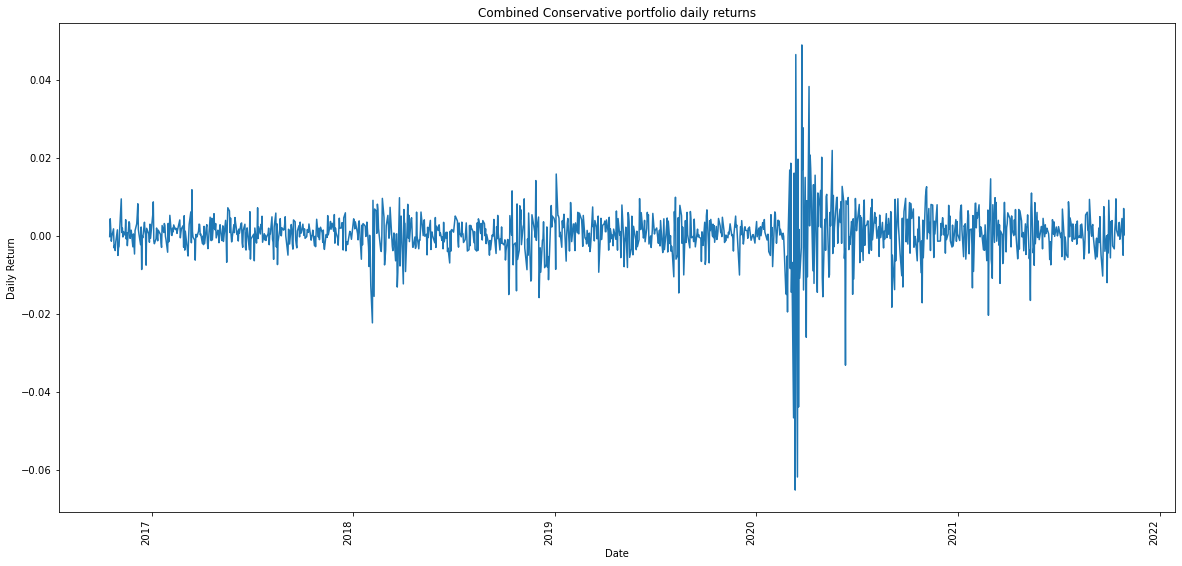

In [88]:
# Plot conservative returns
cons_cummulative_returns_crypto.plot(xlabel = "Date", ylabel = "Daily Return", rot=90, figsize = [20,10], title = "Combined Conservative portfolio daily returns")

In [89]:
# Find cumulative returns for conservative portfolio with crypto and plot
conservative_crypto_cumulative_returns = (1 + cons_cummulative_returns_crypto).cumprod() - 1
conservative_crypto_cumulative_returns_plot = conservative_crypto_cumulative_returns.hvplot(title = "Conservative Crypto Portfolio Returns", xlabel = "Date", ylabel = "% Return")
conservative_crypto_cumulative_returns_plot

:Curve   [Date]   (0)

In [90]:
conservative_crypto_cumulative_returns

Date
2016-10-14         NaN
2016-10-17   -0.000199
2016-10-18    0.004173
2016-10-19    0.005661
2016-10-20    0.004278
                ...   
2021-10-25    0.704369
2021-10-26    0.702015
2021-10-27    0.693527
2021-10-28    0.705414
2021-10-29    0.705863
Length: 1262, dtype: float64

### Cumalitive returns of moderate portfolio with crypto

In [91]:
# Find percentage change
mod_returns_crypto = mod_combined_MC.pct_change()
mod_returns_crypto.head()

ETH       BTC       BND        VB        VV       VWO  \
               close     close     close     close     close     close   
Date                                                                     
2016-10-14       NaN       NaN       NaN       NaN       NaN       NaN   
2016-10-17  0.003356  0.002398  0.002162 -0.001767 -0.002972 -0.001876   
2016-10-18  0.048495 -0.006958  0.001318  0.005817  0.006064  0.017718   
2016-10-19 -0.042265 -0.008377  0.000718  0.004275  0.002452  0.005276   
2016-10-20  0.004163 -0.002763 -0.000598 -0.003172 -0.000917 -0.001312   

                VXUS  
               close  
Date                  
2016-10-14       NaN  
2016-10-17 -0.001950  
2016-10-18  0.011941  
2016-10-19  0.003433  
2016-10-20 -0.000428

In [92]:
# Calculate cummulative return
mod_cummulative_returns_crypto = mod_returns_crypto.dot(mod_weights_crypto)
mod_cummulative_returns_crypto.head()

Date
2016-10-14         NaN
2016-10-17   -0.000660
2016-10-18    0.006784
2016-10-19    0.001242
2016-10-20   -0.001194
dtype: float64

<AxesSubplot:title={'center':'Combined Moderate portfolio daily returns'}, xlabel='Date', ylabel='Daily Return'>

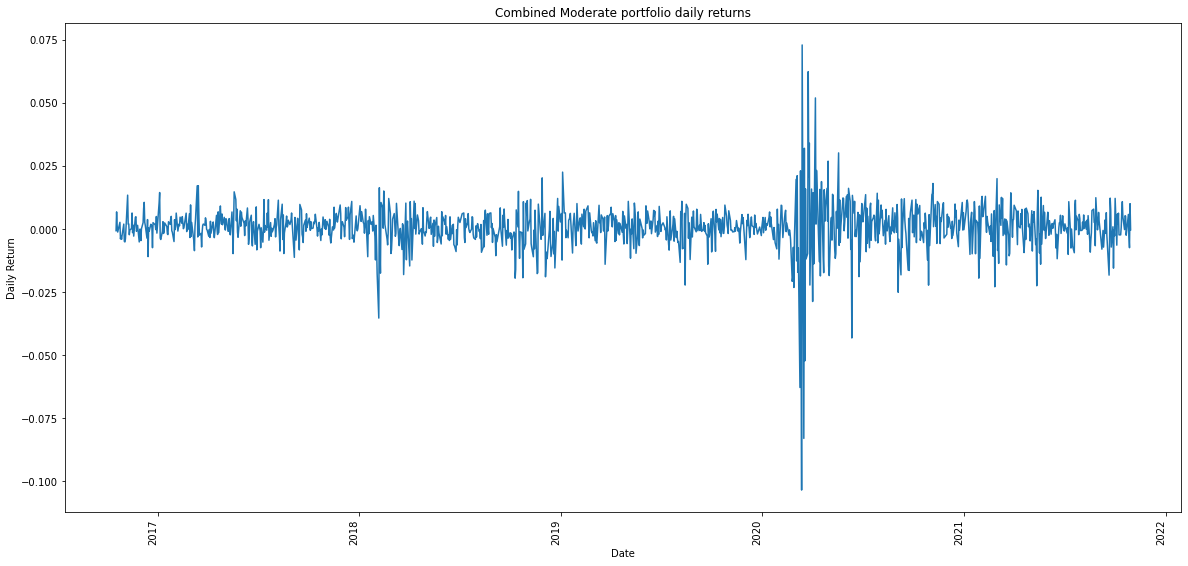

In [93]:
# Plot moderate returns
mod_cummulative_returns_crypto.plot(xlabel = "Date", ylabel = "Daily Return", rot=90, figsize = [20,10], title = "Combined Moderate portfolio daily returns")

In [94]:
# Find cumulative returns for moderate portfolio with crypto and plot
moderate_crypto_cumulative_returns = (1 + mod_cummulative_returns_crypto).cumprod() - 1
moderate_crypto_cumulative_returns_plot = moderate_crypto_cumulative_returns.hvplot(title = "Moderate Crypto Portfolio Returns", xlabel = "Date", ylabel = "% Return")
moderate_crypto_cumulative_returns_plot

:Curve   [Date]   (0)

In [95]:
moderate_crypto_cumulative_returns

Date
2016-10-14         NaN
2016-10-17   -0.000660
2016-10-18    0.006119
2016-10-19    0.007369
2016-10-20    0.006166
                ...   
2021-10-25    1.213168
2021-10-26    1.207037
2021-10-27    1.190696
2021-10-28    1.212700
2021-10-29    1.212016
Length: 1261, dtype: float64

### Cumalitive returns of aggressive portfolio with crypto

In [96]:
# Find percentage change
agg_returns_crypto = mod_combined_MC.pct_change()
agg_returns_crypto.head()

ETH       BTC       BND        VB        VV       VWO  \
               close     close     close     close     close     close   
Date                                                                     
2016-10-14       NaN       NaN       NaN       NaN       NaN       NaN   
2016-10-17  0.003356  0.002398  0.002162 -0.001767 -0.002972 -0.001876   
2016-10-18  0.048495 -0.006958  0.001318  0.005817  0.006064  0.017718   
2016-10-19 -0.042265 -0.008377  0.000718  0.004275  0.002452  0.005276   
2016-10-20  0.004163 -0.002763 -0.000598 -0.003172 -0.000917 -0.001312   

                VXUS  
               close  
Date                  
2016-10-14       NaN  
2016-10-17 -0.001950  
2016-10-18  0.011941  
2016-10-19  0.003433  
2016-10-20 -0.000428

In [97]:
# Calculate cummulative return
agg_cummulative_returns_crypto = agg_returns_crypto.dot(agg_weights_crypto)
agg_cummulative_returns_crypto.head()

Date
2016-10-14         NaN
2016-10-17   -0.000398
2016-10-18    0.007526
2016-10-19   -0.000193
2016-10-20   -0.001057
dtype: float64

<AxesSubplot:title={'center':'Combined Aggressive portfolio daily returns'}, xlabel='Date', ylabel='Daily Return'>

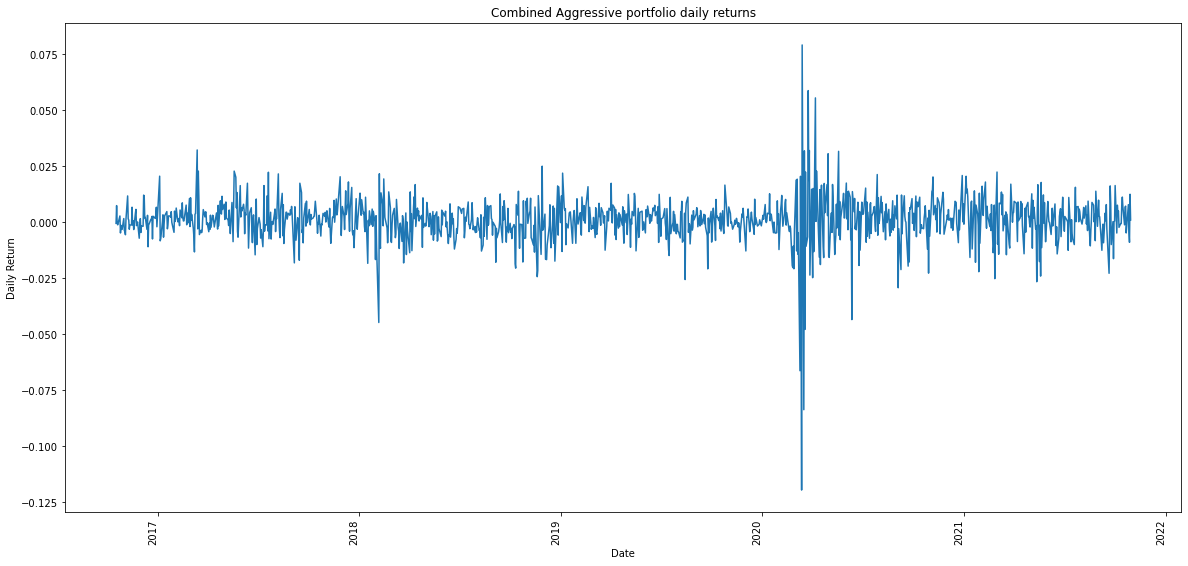

In [98]:
# Plot aggressive returns
agg_cummulative_returns_crypto.plot(xlabel = "Date", ylabel = "Daily Return", rot=90, figsize = [20,10], title = "Combined Aggressive portfolio daily returns")

In [99]:
# Find cumulative returns for aggressive portfolio with crypto and plot
aggressive_crypto_cumulative_returns = (1 + agg_cummulative_returns_crypto).cumprod() - 1
aggressive_crypto_cumulative_returns_plot = aggressive_crypto_cumulative_returns.hvplot(title = "Moderate Crypto Portfolio Returns", xlabel = "Date", ylabel = "% Return")
aggressive_crypto_cumulative_returns_plot

:Curve   [Date]   (0)

In [100]:
aggressive_crypto_cumulative_returns

Date
2016-10-14         NaN
2016-10-17   -0.000398
2016-10-18    0.007125
2016-10-19    0.006931
2016-10-20    0.005866
                ...   
2021-10-25    2.051274
2021-10-26    2.038663
2021-10-27    2.011698
2021-10-28    2.049624
2021-10-29    2.052983
Length: 1261, dtype: float64

In [101]:
conservative_crypto_cumulative_returns_plot * moderate_crypto_cumulative_returns_plot * aggressive_crypto_cumulative_returns_plot

:Overlay
   .Curve.A_0.I   :Curve   [Date]   (0)
   .Curve.A_0.II  :Curve   [Date]   (0)
   .Curve.A_0.III :Curve   [Date]   (0)

In [102]:
# Plot portfolio returns

## Complete and plot monte carlo simulation for all portfolios 

### Monte Carlo for Conservative Portfolio with Crypto

In [103]:
# Define monte carlo simulation for conservative portfoio with digital assets
MC_conservative_combined = MCSimulation(
    portfolio_data = cons_combined_MC,
    weights = cons_weights_crypto,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [104]:
# Run monte carlo simulation
MC_conservative_combined.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/brando/Desktop/Final-Project-1-main/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0          1         2          3         4         5          6    \
0     1.000000   1.000000  1.000000   1.000000  1.000000  1.000000   1.000000   
1     0.998150   0.999985  1.001905   1.002858  1.001353  0.996927   0.996377   
2     0.993696   0.996651  1.004409   1.004351  0.998906  1.003407   0.999476   
3     0.996295   0.999313  1.006469   1.009290  0.997636  1.002050   1.005008   
4     0.992465   1.004430  1.003171   1.010845  1.000764  1.000752   1.004450   
...        ...        ...       ...        ...       ...       ...        ...   
5036  6.208864  10.439606  7.932883  15.465484  7.336415  6.483771  10.543395   
5037  6.180133  10.419620  7.893631  15.557120  7.298412  6.512170  10.575408   
5038  6.236342  10.414288  7.893569  15.602427  7.327303  6.483848  10.580986   
5039  6.280720  10.441635  7.869830  15.729309  7.354420  6.505328  10.609686   
5040  6.235468  10.460817  7.932819  15.811776  7.374266  6.535259  10.612594   

            7          8         9    ...        490        491        492  \
0      1.000000   1.000000  1.000000  ...   1.000000   1.000000   1.000000   
1      0.998757   0.999942  1.004801  ...   1.006595   1.002685   1.003206   
2      1.001805   1.004134  1.004338  ...   1.008353   1.011076   0.999623   
3      1.003287   1.008782  1.003785  ...   1.006687   1.011113   1.002181   
4      0.998497   1.007811  1.010931  ...   1.009524   1.008710   0.998334   
...         ...        ...       ...  ...        ...        ...        ...   
5036  13.218557  12.371328  8.926646  ...  10.265055  14.057975  11.754011   
5037  13.221070  12.394372  8.957465  ...  10.220156  14.046622  11.757958   
5038  13.144021  12.389787  9.007234  ...  10.248322  14.023544  11.833108   
5039  13.133299  12.358001  9.101945  ...  10.280177  14.035191  11.851913   
5040  13.108325  12.355944  9.071676  ...  10.360973  14.063645  11.811243   

            493       494        495        496       497       498        499  
0      1.000000  1.000000   1.000000   1.000000  1.000000  1.000000   1.000000  
1      0.997918  0.995993   0.995456   0.993072  1.002155  1.007069   0.997380  
2      0.992324  0.993643   0.997469   0.990462  1.002369  0.999387   0.995474  
3      0.992051  0.997931   0.995560   0.990720  0.995933  0.999352   1.001066  
4      0.994283  0.997259   0.990022   0.991678  0.999914  1.000745   0.997204  
...         ...       ...        ...        ...       ...       ...        ...  
5036  12.653857  7.976655  10.603411  14.216653  6.432996  4.520927  17.189621  
5037  12.688846  8.014383  10.652101  14.197423  6.461201  4.503812  17.175013  
5038  12.759854  7.976123  10.646148  14.128207  6.429261  4.487974  17.249072  
5039  12.903647  7.987129  10.640344  14.041030  6.454245  4.498003  17.289108  
5040  12.885632  7.969516  10.680368  14.144332  6.512674  4.500265  17.252005  

[5041 rows x 500 columns]

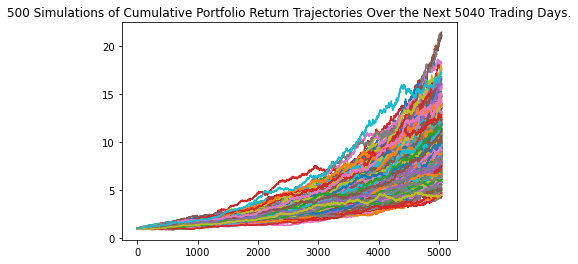

In [105]:
# Line plot for conservative monte carlo sim
line_plot_cons_crypto = MC_conservative_combined.plot_simulation()

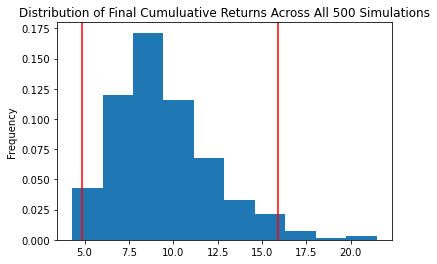

In [106]:
# Distribution plot for conservative monte carlo sim
dist_plot_cons = MC_conservative_combined.plot_distribution()

In [107]:
# Summary statistics
tbl_conservative_combined = MC_conservative_combined.summarize_cumulative_return()
print(tbl_conservative_combined)

count           500.000000
mean              9.437528
std               2.811559
min               4.302555
25%               7.540569
50%               9.065140
75%              10.917759
max              21.449340
95% CI Lower      4.862193
95% CI Upper     15.916027
Name: 5040, dtype: float64


### Monte Carlo for Moderate Portfolio with Crypto

In [108]:
# Define monte carlo simulation for conservative portfoio with digital assets
MC_moderate_combined = MCSimulation(
    portfolio_data = mod_combined_MC,
    weights = mod_weights_crypto,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [109]:
# Run monte carlo simulation
MC_moderate_combined.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/brando/Desktop/Final-Project-1-main/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0          1          2          3          4          5    \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      0.995778   1.010364   1.005331   0.998499   1.003689   0.997945   
2      0.996026   0.999962   1.017055   0.995778   1.008461   0.995279   
3      1.003013   0.993530   1.019939   0.990638   1.014096   0.998187   
4      0.999793   0.993910   1.012629   0.991943   1.012716   0.994565   
...         ...        ...        ...        ...        ...        ...   
5036  22.430117  27.268255  21.463417  68.374897  25.186724  43.976139   
5037  22.305058  27.535939  21.363805  68.262546  25.266995  43.889212   
5038  22.157597  27.795146  21.443050  68.282266  25.295747  43.759624   
5039  22.165542  27.699030  21.449565  68.212775  25.294079  43.784731   
5040  22.057482  27.793865  21.408371  68.616185  25.395331  43.923234   

            6          7          8          9    ...        490        491  \
0      1.000000   1.000000   1.000000   1.000000  ...   1.000000   1.000000   
1      0.996265   1.001869   0.996196   1.003295  ...   1.001580   0.990286   
2      1.001966   1.003491   1.003977   1.004675  ...   1.003093   0.989757   
3      1.014532   1.000419   1.006855   1.004473  ...   1.008715   0.990191   
4      1.018524   0.996603   1.010751   1.001932  ...   1.017975   0.992138   
...         ...        ...        ...        ...  ...        ...        ...   
5036  50.065449  29.686960  52.270504  30.132852  ...  30.973985  14.138356   
5037  50.230028  29.579692  52.291319  30.391181  ...  31.162242  14.174949   
5038  49.802724  29.666086  52.828171  30.129626  ...  31.396609  14.148774   
5039  50.100934  29.713349  52.458417  29.951024  ...  31.136993  14.282394   
5040  50.402172  29.532469  51.977349  30.127619  ...  31.211970  14.269368   

            492        493        494        495        496        497  \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      0.989622   1.004639   0.992384   0.997599   1.004060   1.004872   
2      0.984586   1.009787   0.996558   0.992179   1.010158   1.008481   
3      0.983374   1.007663   1.001260   0.995592   1.010387   1.009313   
4      0.986658   0.998139   1.008225   0.995057   1.014655   1.007921   
...         ...        ...        ...        ...        ...        ...   
5036  28.606241  15.703074  49.489308  25.421889  23.424739  23.918309   
5037  28.657212  15.692606  50.021833  25.309699  23.568826  23.873983   
5038  28.760946  15.642962  49.790079  25.124369  23.559326  23.991079   
5039  28.941150  15.632861  49.610710  24.971087  23.697922  24.197069   
5040  28.808327  15.692016  49.900487  25.049821  23.757639  24.247979   

            498        499  
0      1.000000   1.000000  
1      1.003707   1.004542  
2      1.004892   0.999873  
3      1.005144   0.995374  
4      0.992963   0.988419  
...         ...        ...  
5036  45.344159  38.960076  
5037  45.436718  38.693812  
5038  45.579682  38.581668  
5039  45.755519  38.774377  
5040  45.984756  38.820130  

[5041 rows x 500 columns]

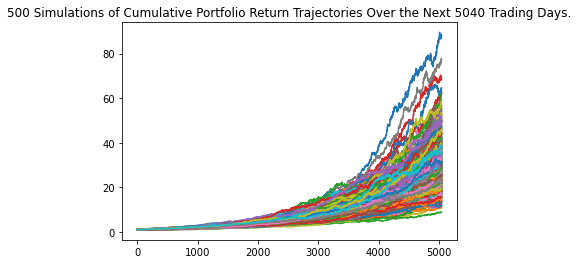

In [110]:
# Line plot for moderate monte carlo sim
line_plot_mod_crypto = MC_moderate_combined.plot_simulation()

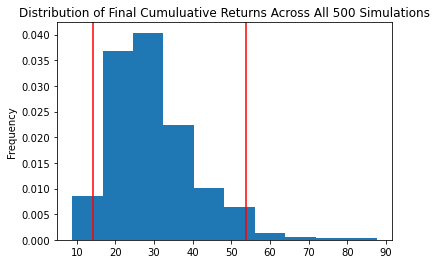

In [111]:
# Distribution plot for conservative monte carlo sim
dist_plot_mod = MC_moderate_combined.plot_distribution()

In [112]:
# Summary statistics
tbl_moderate_combined = MC_moderate_combined.summarize_cumulative_return()
print(tbl_moderate_combined)

count           500.000000
mean             29.734690
std              10.770721
min               8.808651
25%              21.611060
50%              28.420196
75%              35.128349
max              87.568610
95% CI Lower     14.112970
95% CI Upper     53.903419
Name: 5040, dtype: float64


### Monte Carlo for Aggressive Portfolio with Crypto

In [113]:
# Define monte carlo simulation for conservative portfoio with digital assets
MC_aggressive_combined = MCSimulation(
    portfolio_data = mod_combined_MC,
    weights = agg_weights_crypto,
    num_simulation = 500,
    num_trading_days = 252*20
)

In [114]:
# Run monte carlo simulation
MC_aggressive_combined.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/brando/Desktop/Final-Project-1-main/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0           1          2           3          4           5    \
0       1.000000    1.000000   1.000000    1.000000   1.000000    1.000000   
1       1.001781    0.988561   1.006810    1.001411   1.004616    1.000489   
2       1.005866    0.987189   1.006950    0.992625   1.002189    1.009619   
3       1.010914    0.993718   1.010279    0.989939   1.006600    1.021693   
4       1.007082    0.993983   1.005170    0.988159   1.004632    1.026255   
...          ...         ...        ...         ...        ...         ...   
5036  142.137464  143.865790  76.021723  124.066056  76.855088  108.929325   
5037  143.112600  143.869282  76.651532  123.358834  76.278893  108.804559   
5038  141.438533  143.681836  76.747521  123.788475  76.544183  107.477533   
5039  142.532332  144.169459  77.380130  125.425225  77.226708  106.764181   
5040  143.500220  144.235532  77.935452  125.281899  76.803593  107.806508   

            6          7           8           9    ...         490  \
0      1.000000   1.000000    1.000000    1.000000  ...    1.000000   
1      1.004226   0.998581    1.008285    0.998231  ...    0.991444   
2      1.010491   0.991090    1.004786    1.003425  ...    0.989945   
3      1.009503   0.978489    1.001600    1.010020  ...    0.991682   
4      1.007279   0.979373    1.014391    1.011506  ...    0.992580   
...         ...        ...         ...         ...  ...         ...   
5036  60.733799  80.314346  123.438244  179.497298  ...  126.575280   
5037  61.097225  80.510696  124.035011  178.136556  ...  126.312067   
5038  61.379606  80.188846  123.560046  178.403950  ...  126.324633   
5039  61.265182  80.259005  122.432272  177.302952  ...  126.594684   
5040  61.315353  80.013798  122.863047  177.644535  ...  126.339502   

             491        492         493         494        495        496  \
0       1.000000   1.000000    1.000000    1.000000   1.000000   1.000000   
1       0.998417   1.006219    1.003402    0.991182   1.001701   1.005699   
2       0.989756   1.004141    0.997910    0.996920   0.999535   0.997953   
3       1.001768   0.998571    0.996597    0.999405   1.003541   0.990154   
4       1.003160   1.000406    1.001486    0.995519   0.991548   0.986214   
...          ...        ...         ...         ...        ...        ...   
5036  134.022963  94.824250  119.791109  167.883621  89.699641  27.615784   
5037  135.282841  95.898715  120.221383  166.634074  89.552906  27.440100   
5038  136.008473  95.273140  118.784741  166.823021  89.843335  27.370007   
5039  135.924254  95.214465  119.300417  168.601277  90.399942  27.354728   
5040  135.224953  96.084613  118.458110  169.289463  90.232658  27.313757   

             497         498         499  
0       1.000000    1.000000    1.000000  
1       1.002365    0.988387    0.996689  
2       1.005627    0.988210    1.004813  
3       1.001746    0.994919    1.000212  
4       1.004662    0.986927    0.993345  
...          ...         ...         ...  
5036  165.717522  158.278882  105.703191  
5037  166.880067  156.757408  106.730672  
5038  166.998219  156.611884  105.075300  
5039  168.122899  156.725518  106.360684  
5040  169.165632  156.280079  105.530703  

[5041 rows x 500 columns]

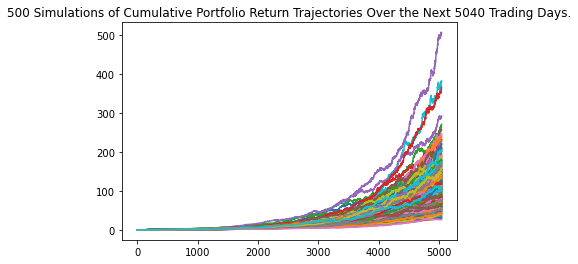

In [115]:
# Line plot for moderate monte carlo sim
line_plot_agg_crypto = MC_aggressive_combined.plot_simulation()

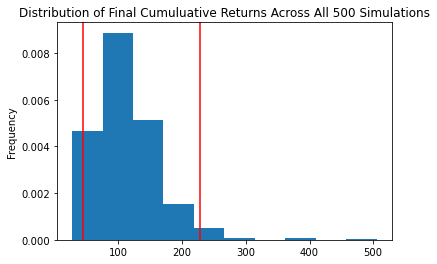

In [116]:
# Distribution plot for conservative monte carlo sim
dist_plot_agg = MC_aggressive_combined.plot_distribution()

In [117]:
# Summary statistics
tbl_aggressive_combined = MC_aggressive_combined.summarize_cumulative_return()
print(tbl_aggressive_combined)

count           500.000000
mean            112.492899
std              50.732304
min              27.313757
25%              77.867006
50%             103.159142
75%             137.926187
max             505.223546
95% CI Lower     44.172464
95% CI Upper    227.845958
Name: 5040, dtype: float64


## Find and plot Beta and Sharpe Ratios for all portfolios

### Beta of conservative portfolio with crypto

In [118]:
# Define risk free rate of return
rf_rate = 0.0158/365

In [121]:
sp500_csv = Path('Conservative_Combined_Porfolio.csv')
sp500_data = pd.read_csv(sp500_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
sp500_change= sp500_data.pct_change()
sp500_change.head()

ETH       BTC       BIV       BSV        VB        VV  \
Date                                                                     
2016-10-14       NaN       NaN       NaN       NaN       NaN       NaN   
2016-10-15  0.002517  0.000204  0.000000  0.000000  0.000000  0.000000   
2016-10-16  0.000000  0.005892  0.000000  0.000000  0.000000  0.000000   
2016-10-17  0.000837 -0.003676  0.002075  0.001491 -0.001767 -0.002972   
2016-10-18  0.048495 -0.006958  0.001725  0.000248  0.005817  0.006064   

                VXUS  
Date                  
2016-10-14       NaN  
2016-10-15  0.000000  
2016-10-16  0.000000  
2016-10-17 -0.001950  
2016-10-18  0.011941

In [122]:
cons_cummulative_returns_crypto

Date
2016-10-14         NaN
2016-10-17   -0.000199
2016-10-18    0.004372
2016-10-19    0.001482
2016-10-20   -0.001375
                ...   
2021-10-25    0.004449
2021-10-26   -0.001381
2021-10-27   -0.004987
2021-10-28    0.007019
2021-10-29    0.000264
Length: 1262, dtype: float64

In [134]:
# Find conservative covariance
conservative_combined_covariance = cons_cummulative_returns_crypto.cov(sp500_change["BIV"])
conservative_combined_covariance

1.948515939711731e-06

In [126]:
# Calculate the variance of the SP500
variance = sp500_change['BIV'].var()
variance

5.54965803471336e-06

In [127]:
# Calculate beta of conservative portfolio
conservative_beta_crypto = conservative_combined_covariance/variance
conservative_beta_crypto

0.3511055866007737

### Beta of moderate portfolio with crypto

In [129]:
# Find moderate covariance
moderate_combined_covariance = mod_cummulative_returns_crypto.cov(sp500_change['BIV'])
moderate_combined_covariance

7.990455024686983e-07

In [130]:
# Calculate beta of moderate portfolio
moderate_beta_crypto = moderate_combined_covariance/variance
moderate_beta_crypto

0.1439810340512213

### Beta of aggressive portfolio with crypto

In [131]:
# Find aggressive covariance
aggressive_combined_covariance = aggressive_crypto_cumulative_returns.cov(sp500_change['BIV'])
aggressive_combined_covariance

-2.4505680782600777e-05

In [132]:
# Calculate beta of aggressive portfolio
aggressive_beta_crypto = aggressive_combined_covariance/variance
aggressive_beta_crypto

-4.41571005444239

## Sharpe Ratios for all portfolios

In [135]:
# Calculate conservative portfolio sharpe ratio
conservative_crypto_sharpe_ratio = ((cons_cummulative_returns_crypto.mean() - rf_rate)/ (cons_cummulative_returns_crypto.std() * np.sqrt(252)))
conservative_crypto_sharpe_ratio

0.003907729999606194

In [136]:
# Calculate moderate portfolio sharpe ratio
moderate_crypto_sharpe_ratio = ((mod_cummulative_returns_crypto.mean() - rf_rate)/ (mod_cummulative_returns_crypto.std() * np.sqrt(252)))
moderate_crypto_sharpe_ratio

0.004411213536718502

In [137]:
# Calculate aggressive portfolio sharpe ratio
aggressive_crypto_sharpe_ratio = ((agg_cummulative_returns_crypto.mean() - rf_rate)/ (agg_cummulative_returns_crypto.std() * np.sqrt(252)))
aggressive_crypto_sharpe_ratio

0.005568776783298056

## Compare risk and return of traditional portfolios vs. portfolios with digital assets

In [185]:
# Compare results of monte carlo simulations


In [183]:
mean_aggressive = MC_aggressive_combined.summarize_cumulative_return()['mean']
min_aggressive = MC_aggressive_combined.summarize_cumulative_return()['min']

mean_moderate = MC_moderate_combined.summarize_cumulative_return()['mean']
mean_conservative = MC_conservative_combined.summarize_cumulative_return()['mean']

In [184]:
print("Now we see the aggressive portfolio has about 4x greater return compare to the moderate risk portfolio.")
print("")
print("Aggressive Mean: ", mean_aggressive)
print("Moderate Mean: ", mean_moderate)
print("Conservative Mean: ", mean_conservative)

Now we see the aggressive portfolio has about 4x greater return compare to the moderate risk portfolio.

Aggressive Mean:  115.92008730655395
Moderate Mean:  29.210322966498534
Conservative Mean:  9.539430601341188


In [151]:
# Compare result cumulative returns 
Combined_cumulative_returns = aggressive_crypto_cumulative_returns + moderate_crypto_cumulative_returns + conservative_crypto_cumulative_returns
Combined_cumulative_returns



Date
2016-10-14         NaN
2016-10-17   -0.001257
2016-10-18    0.017417
2016-10-19    0.019960
2016-10-20    0.016310
                ...   
2021-10-25    3.968811
2021-10-26    3.947716
2021-10-27    3.895921
2021-10-28    3.967738
2021-10-29    3.970862
Length: 1262, dtype: float64

In [152]:
# Plot and compare beta
combined_beta_df = moderate_beta_crypto + aggressive_beta_crypto + conservative_beta_crypto
combined_beta_df

-3.9206234337903947

In [153]:
# Compare Sharpe ratios 
combined_sharpes = conservative_crypto_sharpe_ratio + moderate_crypto_sharpe_ratio + aggressive_crypto_sharpe_ratio
combined_sharpes


0.013887720319622751

## Identify locales in Philadelphia market to market each custom portfolio based on demographic

In [ ]:
# Define demographic parameters of target clients for each portfolio

In [ ]:
# Use an API to find geographic markets for each portfolio

In [ ]:
# Plot markets with Mapbox